# Google Play

##### The problem

Development is racing with the new science to provide what is modern in the world of technology,
and the rates of competition between companies are increasing,
such as companies that create applications they may need special criteria 
to know the success of the application or the failure of the application, 
such as knowing the best type of applications, the right price and size.

##### questions

What is the main reason for the success of the application?

What is the most downloaded type of application?

What is the profit rate forecast for applications?

##### The Solution

We will prepare the data and use machine language to predict the profits of applications 
and the main reason for its success and classify the most downloaded applications

# Step 0: Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns 
#visualisation
import matplotlib.pyplot as plt  
#visualisation
%matplotlib inline     
sns.set(color_codes=True)

# Step 1: Loading the data into the data frame

In [2]:
#Read and display data
df = pd.read_csv("googlep.csv")
df.head(5) 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.0,159,19,10000,Free,0,Everyone,Art & Design,2018,4.0.3
1,Coloring book moana,ART_AND_DESIGN,4.0,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2018,4.0.3
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,5.0,87510,44780,5000000,Free,0,Everyone,Art & Design,2018,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,5.0,215644,25,50000000,Free,0,Teen,Art & Design,2018,44٬653٫00
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.0,967,44600,100000,Free,0,Everyone,Art & Design;Creativity,2018,44٬655٫00


# EDA

# Step 2:Claen Data

### Checking the types of data

In [3]:
df.dtypes

App               object
Category          object
Rating           float64
Reviews           object
Size              object
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
AndroidVer        object
dtype: object

### Dropping irrelevant columns

In [4]:
df = df.drop(['Size','AndroidVer','App'], axis=1)
df.head(5)

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,LastUpdated
0,ART_AND_DESIGN,4.0,159,10000,Free,0,Everyone,Art & Design,2018
1,ART_AND_DESIGN,4.0,967,500000,Free,0,Everyone,Art & Design;Pretend Play,2018
2,ART_AND_DESIGN,5.0,87510,5000000,Free,0,Everyone,Art & Design,2018
3,ART_AND_DESIGN,5.0,215644,50000000,Free,0,Teen,Art & Design,2018
4,ART_AND_DESIGN,4.0,967,100000,Free,0,Everyone,Art & Design;Creativity,2018


 ### Renaming the columns


We changed the name of column to clarify its meaning

In [5]:
df.columns =['Category','Rating','Reviews','Installs','Type','Price','ContentRating','Genres','LastUpdated']

In [6]:
df=df.rename(columns={'LastUpdated':"Annualupdate"})

In [7]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate
0,ART_AND_DESIGN,4.0,159,10000,Free,0,Everyone,Art & Design,2018
1,ART_AND_DESIGN,4.0,967,500000,Free,0,Everyone,Art & Design;Pretend Play,2018
2,ART_AND_DESIGN,5.0,87510,5000000,Free,0,Everyone,Art & Design,2018
3,ART_AND_DESIGN,5.0,215644,50000000,Free,0,Teen,Art & Design,2018
4,ART_AND_DESIGN,4.0,967,100000,Free,0,Everyone,Art & Design;Creativity,2018


### Dropping the duplicate rows


In [8]:
df.shape

(10841, 9)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (926, 9)


In [10]:
#Number of rows before removing duplicate values
df.count() 

Category         10841
Rating            9367
Reviews          10841
Installs         10841
Type             10840
Price            10841
ContentRating    10840
Genres           10841
Annualupdate     10841
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
#Number of rows after removing duplicate values
df.count()

Category         9915
Rating           8825
Reviews          9915
Installs         9915
Type             9914
Price            9915
ContentRating    9914
Genres           9915
Annualupdate     9915
dtype: int64

### Dropping the missing or null values.

In [13]:
print(df.isnull().sum()) 

Category            0
Rating           1090
Reviews             0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
Annualupdate        0
dtype: int64


In [14]:
#The number of rows after removing the Null values etc.
df = df.dropna()    
df.count()

Category         8824
Rating           8824
Reviews          8824
Installs         8824
Type             8824
Price            8824
ContentRating    8824
Genres           8824
Annualupdate     8824
dtype: int64

In [15]:
print(df.isnull().sum()) 

Category         0
Rating           0
Reviews          0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
Annualupdate     0
dtype: int64


In [16]:
df.isna()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10833,False,False,False,False,False,False,False,False,False
10834,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False


### Convert from object to numeric

In [17]:
df.Price = pd.to_numeric(df.Price,errors='coerce')
df.Reviews = pd.to_numeric(df.Reviews,errors='coerce')
df.Rating = pd.to_numeric(df.Rating,errors='coerce')
df.Installs = pd.to_numeric(df.Installs,errors='coerce')
df.Annualupdate = pd.to_numeric(df.Annualupdate,errors='coerce')

In [18]:
# Verify the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8824 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       8824 non-null   object 
 1   Rating         8824 non-null   float64
 2   Reviews        8824 non-null   int64  
 3   Installs       8824 non-null   int64  
 4   Type           8824 non-null   object 
 5   Price          8824 non-null   int64  
 6   ContentRating  8824 non-null   object 
 7   Genres         8824 non-null   object 
 8   Annualupdate   8824 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 689.4+ KB


In [19]:
df.value_counts

<bound method DataFrame.value_counts of                   Category  Rating  Reviews  Installs  Type  Price  \
0           ART_AND_DESIGN     4.0      159     10000  Free      0   
1           ART_AND_DESIGN     4.0      967    500000  Free      0   
2           ART_AND_DESIGN     5.0    87510   5000000  Free      0   
3           ART_AND_DESIGN     5.0   215644  50000000  Free      0   
4           ART_AND_DESIGN     4.0      967    100000  Free      0   
...                    ...     ...      ...       ...   ...    ...   
10833  BOOKS_AND_REFERENCE     5.0       44      1000  Free      0   
10834               FAMILY     4.0        7       500  Free      0   
10836               FAMILY     5.0       38      5000  Free      0   
10839  BOOKS_AND_REFERENCE     5.0      114      1000  Free      0   
10840            LIFESTYLE     5.0   398307  10000000  Free      0   

      ContentRating                     Genres  Annualupdate  
0          Everyone               Art & Design          

## Add column

In [20]:
df['profits']= df['Installs']*df['Price']

In [21]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'ContentRating', 'Genres', 'Annualupdate', 'profits'],
      dtype='object')

In [22]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits
0,ART_AND_DESIGN,4.0,159,10000,Free,0,Everyone,Art & Design,2018,0
1,ART_AND_DESIGN,4.0,967,500000,Free,0,Everyone,Art & Design;Pretend Play,2018,0
2,ART_AND_DESIGN,5.0,87510,5000000,Free,0,Everyone,Art & Design,2018,0
3,ART_AND_DESIGN,5.0,215644,50000000,Free,0,Teen,Art & Design,2018,0
4,ART_AND_DESIGN,4.0,967,100000,Free,0,Everyone,Art & Design;Creativity,2018,0


In [23]:
df[df['profits']!=0]

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits
234,BUSINESS,5.0,11442,100000,Paid,5,Everyone,Business,2018,500000
235,BUSINESS,5.0,10295,100000,Paid,5,Everyone,Business,2017,500000
427,COMMUNICATION,4.0,18247,100000,Paid,4,Everyone,Communication,2018,400000
476,DATING,4.0,1545,10000,Paid,4,Mature,Dating,2018,40000
477,DATING,3.0,57,1000,Paid,7,Everyone,Dating,2017,7000
...,...,...,...,...,...,...,...,...,...,...
10679,GAME,5.0,11235,100000,Paid,3,Everyone,Card,2018,300000
10682,GAME,4.0,85468,1000000,Paid,1,Everyone,Arcade,2018,1000000
10760,HEALTH_AND_FITNESS,4.0,35,1000,Paid,8,Everyone,Health & Fitness,2018,8000
10782,GAME,4.0,252,10000,Paid,17,Teen,Action,2015,170000


In [24]:
df.replace([ ' ','NaN', 'Na','NA', '#', '?', '/'], np.nan).isna().sum()

Category         0
Rating           0
Reviews          0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
Annualupdate     0
profits          0
dtype: int64

# Convert column type and change values

In [25]:
df.Category.value_counts()

FAMILY                 1704
GAME                   1073
TOOLS                   725
PRODUCTIVITY            331
FINANCE                 313
COMMUNICATION           307
PERSONALIZATION         306
PHOTOGRAPHY             304
LIFESTYLE               298
MEDICAL                 293
SPORTS                  285
BUSINESS                266
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      212
TRAVEL_AND_LOCAL        205
SHOPPING                200
BOOKS_AND_REFERENCE     176
VIDEO_PLAYERS           160
DATING                  157
EDUCATION               129
MAPS_AND_NAVIGATION     123
ENTERTAINMENT           110
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        72
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       63
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [26]:
cate_dict = {
'FAMILY'                   :0,
'GAME'                     :1,
'TOOLS'                    :2,
'PRODUCTIVITY'             :3,
'FINANCE'                  :4,
'COMMUNICATION'            :5,
'PERSONALIZATION'          :6,
'PHOTOGRAPHY'              :7,
'LIFESTYLE'                :8,
'MEDICAL'                  :9,
'SPORTS'                  :10,
'BUSINESS'                :11,
'HEALTH_AND_FITNESS'      :12,
'SOCIAL'                  :13,
'NEWS_AND_MAGAZINES'      :14,
'TRAVEL_AND_LOCAL'        :15,
'SHOPPING'                :16,
'BOOKS_AND_REFERENCE'     :17,
'VIDEO_PLAYERS'           :18,
'DATING'                  :19,
'EDUCATION'               :20,
'MAPS_AND_NAVIGATION'     :21,
'ENTERTAINMENT'           :22,
'FOOD_AND_DRINK'          :23,
'WEATHER'                 :24,
'AUTO_AND_VEHICLES'       :25,
'HOUSE_AND_HOME'          :26,
'LIBRARIES_AND_DEMO'      :27,
'ART_AND_DESIGN'          :28,
'COMICS'                  :29,
'PARENTING'               :30,
'EVENTS'                  :31,
'BEAUTY'                  :32}

In [27]:
df.Category.map(cate_dict) 

0        28
1        28
2        28
3        28
4        28
         ..
10833    17
10834     0
10836     0
10839    17
10840     8
Name: Category, Length: 8824, dtype: int64

In [28]:
df['cate'] =df.Category.map(cate_dict)

In [29]:
df.ContentRating.value_counts()

Everyone       7390
Teen           1021
Mature          409
Adults only       3
Unrated           1
Name: ContentRating, dtype: int64

In [30]:
contrating_dict = {
'Everyone'                  :1,
'Teen'                      :2,
'Mature'                    :3,
'Adults only'               :4,
'Unrated'                   :5 }


In [31]:
df.ContentRating.map(contrating_dict)

0        1
1        1
2        1
3        2
4        1
        ..
10833    1
10834    1
10836    1
10839    3
10840    1
Name: ContentRating, Length: 8824, dtype: int64

In [32]:
df['contrating'] =df.ContentRating.map(contrating_dict)

In [33]:
df.Type.value_counts()

Free    8214
Paid     610
Name: Type, dtype: int64

In [34]:
Ty_dict = {
'Free'                  :0, 
'Paid'                  :1}

In [35]:
df.Type.map(Ty_dict)

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10839    0
10840    0
Name: Type, Length: 8824, dtype: int64

In [36]:
df['PFtype'] =df.Type.map(Ty_dict)

In [37]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
0,ART_AND_DESIGN,4.0,159,10000,Free,0,Everyone,Art & Design,2018,0,28,1,0
1,ART_AND_DESIGN,4.0,967,500000,Free,0,Everyone,Art & Design;Pretend Play,2018,0,28,1,0
2,ART_AND_DESIGN,5.0,87510,5000000,Free,0,Everyone,Art & Design,2018,0,28,1,0
3,ART_AND_DESIGN,5.0,215644,50000000,Free,0,Teen,Art & Design,2018,0,28,2,0
4,ART_AND_DESIGN,4.0,967,100000,Free,0,Everyone,Art & Design;Creativity,2018,0,28,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8824 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       8824 non-null   object 
 1   Rating         8824 non-null   float64
 2   Reviews        8824 non-null   int64  
 3   Installs       8824 non-null   int64  
 4   Type           8824 non-null   object 
 5   Price          8824 non-null   int64  
 6   ContentRating  8824 non-null   object 
 7   Genres         8824 non-null   object 
 8   Annualupdate   8824 non-null   int64  
 9   profits        8824 non-null   int64  
 10  cate           8824 non-null   int64  
 11  contrating     8824 non-null   int64  
 12  PFtype         8824 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 965.1+ KB


In [39]:
 df.describe()

,Rating,Reviews,Installs,Price,Annualupdate,profits,cate,contrating,PFtype
count,8824.000000,8.824000e+03,8.824000e+03,8824.000000,8824.000000,8.824000e+03,8824.000000,8824.000000,8824.000000
mean,4.215888,4.763893e+05,1.661419e+07,0.967135,2017.399479,4.156222e+04,7.958409,1.209882,0.069130
std,0.635721,2.915932e+06,8.669639e+07,16.251482,1.119457,1.178667e+06,8.186258,0.511823,0.253689
min,1.000000,1.000000e+00,1.000000e+00,0.000000,2010.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,4.000000,1.760000e+02,1.000000e+04,0.000000,2017.000000,0.000000e+00,1.000000,1.000000,0.000000
50%,4.000000,4.953500e+03,5.000000e+05,0.000000,2018.000000,0.000000e+00,5.000000,1.000000,0.000000
75%,5.000000,7.227975e+04,5.000000e+06,0.000000,2018.000000,0.000000e+00,13.000000,1.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018.000000,7.000000e+07,32.000000,5.000000,1.000000


In [40]:
df[df['Price'] == df['Price'].max()]

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
4197,FAMILY,4.0,6,100,Paid,400,Everyone,Entertainment,2018,40000,0,1,1
4362,LIFESTYLE,4.0,718,10000,Paid,400,Everyone,Lifestyle,2018,4000000,8,1,1
4367,LIFESTYLE,4.0,275,10000,Paid,400,Everyone,Lifestyle,2018,4000000,8,1,1
5351,LIFESTYLE,4.0,3547,100000,Paid,400,Everyone,Lifestyle,2018,40000000,8,1,1
5354,FAMILY,4.0,856,10000,Paid,400,Everyone,Entertainment,2018,4000000,0,1,1
5356,FINANCE,4.0,1867,50000,Paid,400,Everyone,Finance,2017,20000000,4,1,1
5358,FINANCE,4.0,93,1000,Paid,400,Everyone,Finance,2017,400000,4,1,1
5359,FINANCE,4.0,472,5000,Paid,400,Everyone,Finance,2017,2000000,4,1,1
5362,FAMILY,4.0,201,5000,Paid,400,Everyone,Entertainment,2017,2000000,0,1,1
5364,FINANCE,4.0,129,1000,Paid,400,Teen,Finance,2017,400000,4,2,1


In [41]:
df[df['profits'] == df['profits'].max()]

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
2241,FAMILY,5.0,2376564,10000000,Paid,7,Everyone,Arcade;Action & Adventure,2018,70000000,0,1,1
4347,FAMILY,5.0,2375336,10000000,Paid,7,Everyone,Arcade;Action & Adventure,2018,70000000,0,1,1


In [42]:
df[df['Reviews'] == df['Reviews'].max()]

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
2544,SOCIAL,4.0,78158306,1000000000,Free,0,Teen,Social,2018,0,13,2,0


In [43]:
df.groupby('Category')[['contrating']].max()

,contrating
Category,
ART_AND_DESIGN,2
AUTO_AND_VEHICLES,2
BEAUTY,3
BOOKS_AND_REFERENCE,3
BUSINESS,2
COMICS,4
COMMUNICATION,3
DATING,3
EDUCATION,3


In [44]:
df.groupby('Category')[['Rating']].mean()

,Rating
Category,
ART_AND_DESIGN,4.387097
AUTO_AND_VEHICLES,4.263889
BEAUTY,4.357143
BOOKS_AND_REFERENCE,4.448864
BUSINESS,4.097744
COMICS,4.206897
COMMUNICATION,4.081433
DATING,3.974522
EDUCATION,4.410853


In [45]:
df.groupby('Category')[['Installs']].max()

,Installs
Category,
ART_AND_DESIGN,50000000
AUTO_AND_VEHICLES,10000000
BEAUTY,10000000
BOOKS_AND_REFERENCE,1000000000
BUSINESS,100000000
COMICS,10000000
COMMUNICATION,1000000000
DATING,10000000
EDUCATION,100000000


# visualization of data

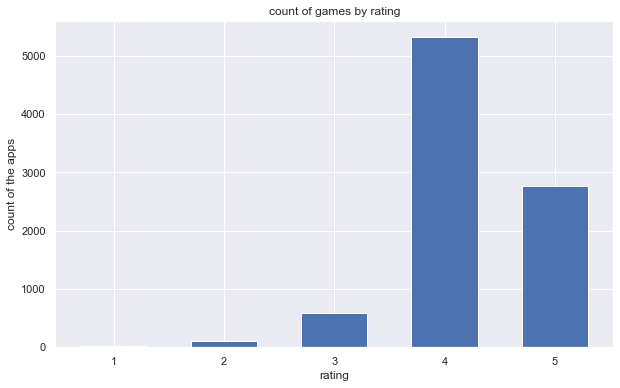

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
# Specify how our lines should look
x = [Vtype for Vtype in set( df['Rating'] )]
y = [ df['Rating'].where(df['Rating']==Vtype).count() for Vtype in set( df['Rating']) ]
ax.bar(x, y,width=0.6)
# Same as above
#fontsize = 10, va='bottom', ha='left'
ax.set_ylabel('count of the apps')
ax.set_xlabel('rating')
ax.set_title('count of games by rating');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

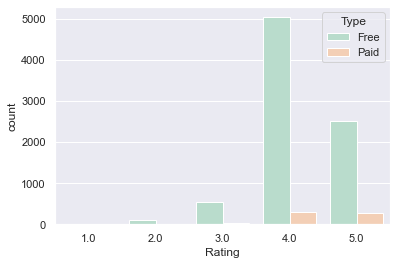

In [47]:
sns.set_style('darkgrid')
sns.countplot(df.Rating,hue='Type', data=df,palette = 'Pastel2')

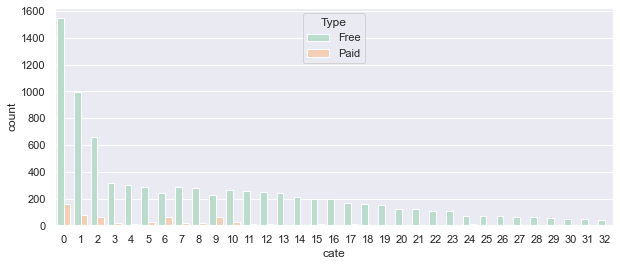

In [48]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
sns.countplot( x = 'cate', data = df, palette = 'Pastel2',hue='Type');

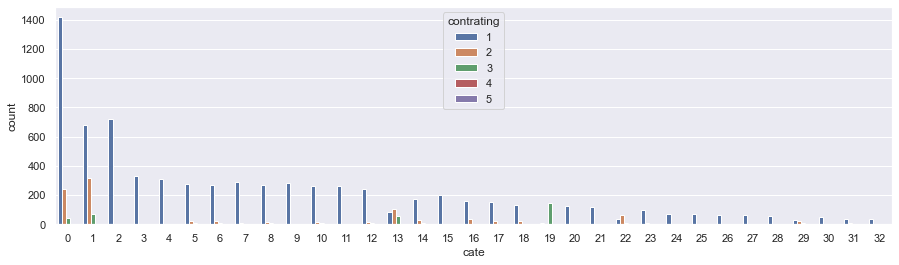

In [49]:

plt.figure(figsize=(15,4))
sns.set_style('darkgrid')
sns.countplot( x ='cate',hue='contrating', data = df );

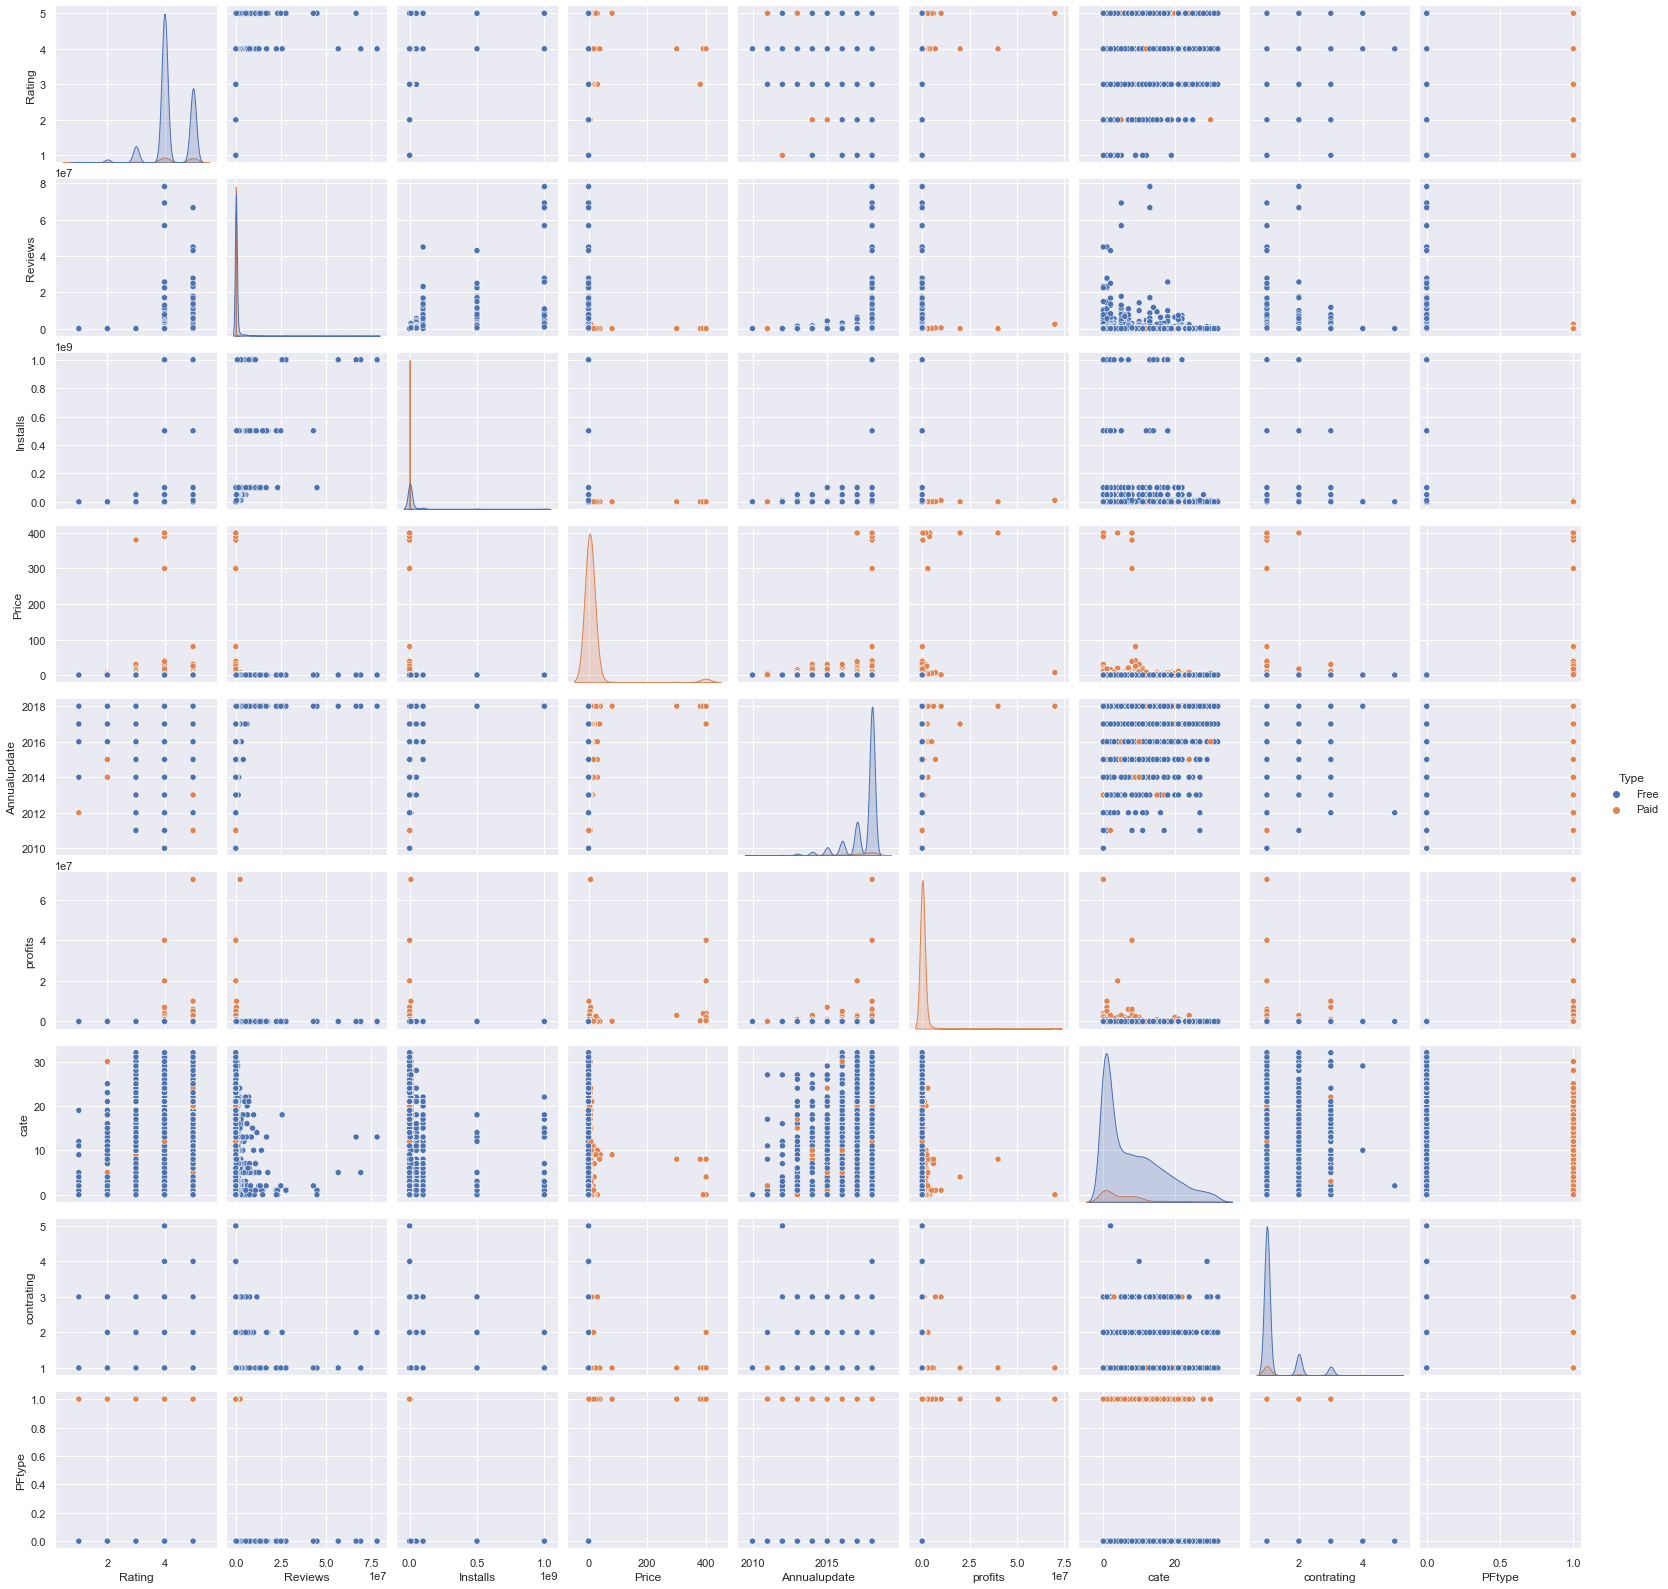

In [50]:
sns.pairplot(df,diag_kind='kde',hue='Type')

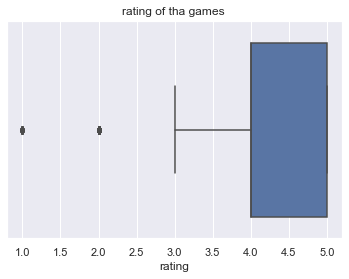

In [51]:
sns.boxplot(x=df['Rating']).set(title='rating of tha games ', xlabel='rating');


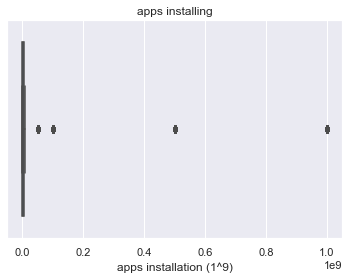

In [52]:
sns.boxplot(x=df['Installs']).set(title='apps installing', xlabel='apps installation (1^9)');
            
#np.mean(df['Installs'])


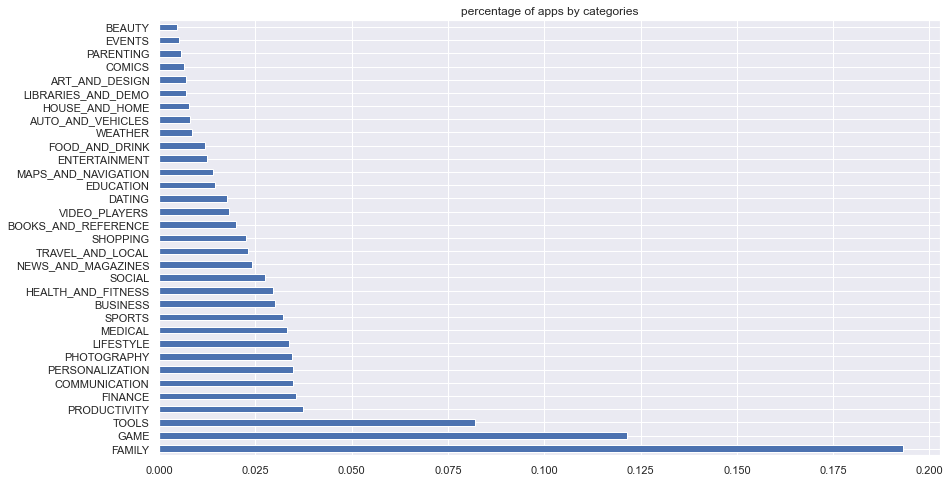

In [53]:
#plot the bar graph of percentage Category categories
plt.figure(figsize=[14,8])
df.Category.value_counts(normalize=True).plot.barh()
plt.title('percentage of apps by categories')
plt.show()

In [54]:
df.Category.value_counts(normalize=True)

FAMILY                 0.193110
GAME                   0.121600
TOOLS                  0.082162
PRODUCTIVITY           0.037511
FINANCE                0.035471
COMMUNICATION          0.034791
PERSONALIZATION        0.034678
PHOTOGRAPHY            0.034451
LIFESTYLE              0.033772
MEDICAL                0.033205
SPORTS                 0.032298
BUSINESS               0.030145
HEALTH_AND_FITNESS     0.029692
SOCIAL                 0.027652
NEWS_AND_MAGAZINES     0.024025
TRAVEL_AND_LOCAL       0.023232
SHOPPING               0.022665
BOOKS_AND_REFERENCE    0.019946
VIDEO_PLAYERS          0.018132
DATING                 0.017792
EDUCATION              0.014619
MAPS_AND_NAVIGATION    0.013939
ENTERTAINMENT          0.012466
FOOD_AND_DRINK         0.012013
WEATHER                0.008500
AUTO_AND_VEHICLES      0.008160
HOUSE_AND_HOME         0.007706
LIBRARIES_AND_DEMO     0.007140
ART_AND_DESIGN         0.007026
COMICS                 0.006573
PARENTING              0.005666
EVENTS  

#### count of games by the type of its content rating


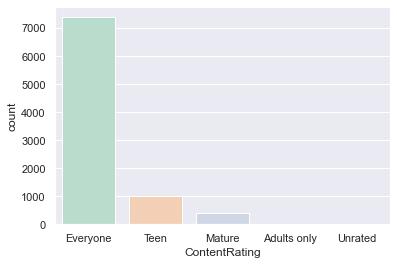

In [55]:
sns.set_style('darkgrid')
sns.countplot( x = 'ContentRating', data = df, palette = 'Pastel2' );

#### count of games by rating and type(Free/paid)

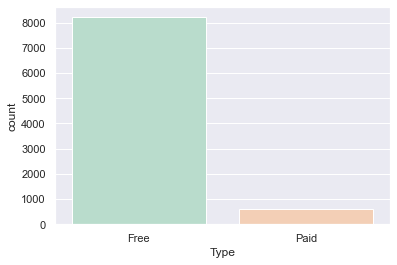

In [56]:
sns.set_style('darkgrid')
sns.countplot( x = 'Type', data = df, palette = 'Pastel2' );

In [57]:
df.corr().style.background_gradient(cmap="Blues")

,Rating,Reviews,Installs,Price,Annualupdate,profits,cate,contrating,PFtype
Rating,1.000000,0.069630,0.026940,-0.014288,0.128682,0.021138,0.011395,-0.006209,0.048708
Reviews,0.069630,1.000000,0.633345,-0.009599,0.079310,0.005601,-0.045897,0.031900,-0.043130
Installs,0.026940,0.633345,1.000000,-0.011376,0.091507,-0.005013,-0.030663,0.022311,-0.051870
Price,-0.014288,-0.009599,-0.011376,1.000000,-0.000643,0.211175,-0.023765,-0.013124,0.218389
Annualupdate,0.128682,0.079310,0.091507,-0.000643,1.000000,0.005578,0.124328,0.060366,-0.166694
profits,0.021138,0.005601,-0.005013,0.211175,0.005578,1.000000,-0.020897,-0.004192,0.129403
cate,0.011395,-0.045897,-0.030663,-0.023765,0.124328,-0.020897,1.000000,0.063056,-0.091012
contrating,-0.006209,0.031900,0.022311,-0.013124,0.060366,-0.004192,0.063056,1.000000,-0.044542
PFtype,0.048708,-0.043130,-0.051870,0.218389,-0.166694,0.129403,-0.091012,-0.044542,1.000000


# Modeling

# Prepare data for training

In [58]:
df.head()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
0,ART_AND_DESIGN,4.0,159,10000,Free,0,Everyone,Art & Design,2018,0,28,1,0
1,ART_AND_DESIGN,4.0,967,500000,Free,0,Everyone,Art & Design;Pretend Play,2018,0,28,1,0
2,ART_AND_DESIGN,5.0,87510,5000000,Free,0,Everyone,Art & Design,2018,0,28,1,0
3,ART_AND_DESIGN,5.0,215644,50000000,Free,0,Teen,Art & Design,2018,0,28,2,0
4,ART_AND_DESIGN,4.0,967,100000,Free,0,Everyone,Art & Design;Creativity,2018,0,28,1,0


## convert Category,ContentRating,Genres to numerical value

In [59]:
def convertCategory(x):
    category = set( df['Category'] )
    return list(category).index(x)

def convertContentRating(x):
    ContentRating = set( df['ContentRating'] )
    return list(ContentRating).index(x)

def convertGenres(x):
    Genres = set( df['Genres'] )
    return list(Genres).index(x)

def convertType(x):
    Type = set( df['Type'] )
    return list(Type).index(x)

new_df = df.copy()
new_df['Category'] = df['Category'].apply(convertCategory)
new_df['ContentRating'] = df['ContentRating'].apply(convertContentRating)
new_df['Genres'] = df['Genres'].apply(convertGenres)
new_df['Type'] = df['Type'].apply(convertType)
new_df.head()

,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres,Annualupdate,profits,cate,contrating,PFtype
0,31,4.0,159,10000,0,0,2,27,2018,0,28,1,0
1,31,4.0,967,500000,0,0,2,93,2018,0,28,1,0
2,31,5.0,87510,5000000,0,0,2,27,2018,0,28,1,0
3,31,5.0,215644,50000000,0,0,4,27,2018,0,28,2,0
4,31,4.0,967,100000,0,0,2,101,2018,0,28,1,0


# Split data into train and test, train 80% and test 20%

In [60]:
from sklearn.model_selection import train_test_split
X = new_df.loc[:,['Category', 'Rating', 'Reviews','Price','Installs','ContentRating','Genres']]
y = new_df.loc[:,'Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [63]:
X_test_sc

array([[-1.78250215,  1.22403877, -0.15879708, ..., -0.19079678,
        -0.17253578,  0.7818353 ],
       [ 1.04655039,  1.22403877,  1.89996874, ...,  0.90177124,
        -0.17253578,  1.28116403],
       [ 1.04655039,  1.22403877, -0.15607896, ..., -0.18544266,
        -0.17253578,  0.2562261 ],
       ...,
       [-1.67772243,  1.22403877, -0.14827069, ..., -0.17997927,
        -0.17253578,  1.12348127],
       [-0.31558602, -0.32833092, -0.158679  , ..., -0.18981337,
        -0.17253578,  1.22860311],
       [-0.52514547, -0.32833092, -0.15297816, ..., -0.18981337,
         2.38077676, -0.26938309]])

In [64]:
X_train_sc

array([[ 0.10353288, -0.32833092, -0.15358622, ..., -0.08163832,
        -0.17253578,  1.36000541],
       [ 1.04655039, -0.32833092, -0.09105817, ..., -0.08163832,
        -0.17253578,  1.12348127],
       [ 1.46566928, -0.32833092,  0.90402107, ...,  0.90177124,
        -0.17253578,  1.20232265],
       ...,
       [-0.52514547,  1.22403877, -0.15869797, ..., -0.19079678,
         2.38077676, -0.34822447],
       [-1.78250215, -0.32833092, -0.07685856, ..., -0.08163832,
        -0.17253578,  0.7818353 ],
       [-1.25860353, -0.32833092, -0.11343828, ..., -0.08163832,
        -0.17253578, -0.82127274]])

 ### KNN:KNeighborsClassifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=6)

In [66]:
y_pred_knn = knn.predict(X_test_sc)

In [67]:
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
y_test

7137    0
2216    0
2107    0
8250    0
900     0
       ..
2286    1
8532    0
789     0
3587    0
4612    1
Name: Type, Length: 1765, dtype: int64

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1703
           1       0.56      1.00      0.72        62

    accuracy                           0.97      1765
   macro avg       0.78      0.99      0.85      1765
weighted avg       0.98      0.97      0.98      1765



In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,y_pred_knn))

[[1654    0]
 [  49   62]]


In [72]:
from sklearn.metrics import f1_score

In [73]:
print(f1_score(y_test,y_pred_knn,average=None))

[0.98540363 0.71676301]


In [74]:
df.Type.value_counts()

Free    8214
Paid     610
Name: Type, dtype: int64

# LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(X_test_sc)

In [77]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [78]:
y_test

7137    0
2216    0
2107    0
8250    0
900     0
       ..
2286    1
8532    0
789     0
3587    0
4612    1
Name: Type, Length: 1765, dtype: int64

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1696
           1       0.62      1.00      0.77        69

    accuracy                           0.98      1765
   macro avg       0.81      0.99      0.88      1765
weighted avg       0.99      0.98      0.98      1765



# Appling Linear regression for the data

In [80]:
from sklearn.model_selection import train_test_split
X1 = new_df.loc[:,['Category', 'Rating', 'Reviews','Type','Installs','ContentRating','Genres']]
y1 = new_df.loc[:,'Price']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [81]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_r,y_train_r)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error
y_pred_r = reg.predict(X_train_r)
score = mean_squared_error(y_train_r, y_pred_r, squared=False)
print(f'accuracy score for train is {score}')

accuracy score for train is 17.66184838956362


In [83]:
from sklearn.metrics import mean_squared_error
y_pred_r = reg.predict(X_test)
score = mean_squared_error(y_test_r, y_pred_r, squared=False)
print(f'accuracy score for test is {score}')

accuracy score for test is 27.17010113206599


# Appling KNN for the data

In [84]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train_r,y_train_r)

KNeighborsRegressor()

In [85]:
from sklearn.metrics import mean_squared_error
y_pred_r = neigh.predict(X_train_r)
score = mean_squared_error(y_train_r, y_pred_r, squared=False)
print(f'RMSE score for train is {score}')

RMSE score for train is 16.02763709569281


In [86]:
from sklearn.metrics import mean_squared_error
y_pred_r= neigh.predict(X_test_r)
score = mean_squared_error(y_test_r, y_pred_r, squared=False)
print(f'RMSE score for train is {score}')

RMSE score for train is 7.740538956867034
